<a href="https://colab.research.google.com/github/SalmanYunus/-University-Recommendations-through-ML-Analysis/blob/main/University_Recommendations_through_ML_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.utils import shuffle
import scipy.stats as stats

# reading the data from csv file
original_data = pd.read_csv('https://raw.githubusercontent.com/hoorvash/COMP3202-6915-W23/main/original_data.csv')
original_data.describe()

,researchExp,industryExp,toeflScore,internExp,greV,greQ,greA,topperCgpa,gmatA,cgpa,gmatQ,cgpaScale,gmatV,admit
count,53644.000000,53644.000000,49230.000000,53630.000000,52388.000000,52424.000000,50786.000000,53641.000000,119.000000,53644.000000,123.000000,53644.000000,114.000000,53644.000000
mean,0.339535,4.056539,109.558826,0.454317,324.457108,422.485999,5.065241,35.754780,6.117647,39.343456,49.325203,55.264820,34.885965,0.521121
std,2.602942,12.028282,35.851480,2.482900,214.403370,320.238652,36.843511,37.442863,12.612327,33.240369,22.288531,45.638637,21.973741,0.499558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,8.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,101.000000,0.000000,152.000000,162.000000,3.000000,8.100000,4.000000,8.170000,46.000000,10.000000,27.000000,0.000000
50%,0.000000,0.000000,107.000000,0.000000,159.000000,168.000000,3.500000,9.600000,5.000000,10.000000,48.000000,100.000000,31.000000,1.000000
75%,0.000000,0.000000,111.000000,0.000000,550.000000,780.000000,4.000000,80.000000,5.000000,71.727500,50.000000,100.000000,34.000000,1.000000
max,53.000000,138.000000,1350.000000,96.000000,5560.000000,7990.000000,1470.000000,100.000000,102.000000,833.000000,168.000000,100.000000,152.000000,1.000000


***This block calculating the percentage of the NaN records to the total records. It's for deciding the way of filling missing values, based on the missing. Since 0.99 percent of the records have atleast one NaN value, we can not omit NaN values by just deleting the record.***

In [ ]:
df = copy.deepcopy(original_data)

num_rows_with_nans = df.shape[0]
# dropping NaN values
df_dropped = df.dropna()
# calculating the remained not NaN values
num_dropped_rows = num_rows_with_nans - df_dropped.count()[0]
print(f'Number of Nan records are {num_dropped_rows} records ')
print(f'{num_dropped_rows/num_rows_with_nans} Percent of the total data are Nan records.')

Number of Nan records are 53637 records 
0.9998695101036462 Percent of the total data are Nan records.


***This block performs data cleaning operations by dropping certain columns,  `gmatA`, `gmatQ` and `gmatV`. We decide to remove these columns from the dataset, because they are not showing that much valuable information about majority of the data. Splitting the 'termAndYear' column, filtering out invalid data, and filling in missing numerical values using the KNNImputer from scikit-learn library.  Also `toeflEssay` is a column that only 1 out of 5 of the rows has this value. We decide to remove this column based on the same reason as well.***

***The 'plot_series_side_by_side' function is used to compare the original data with the data after filling in missing values for each numerical column.***


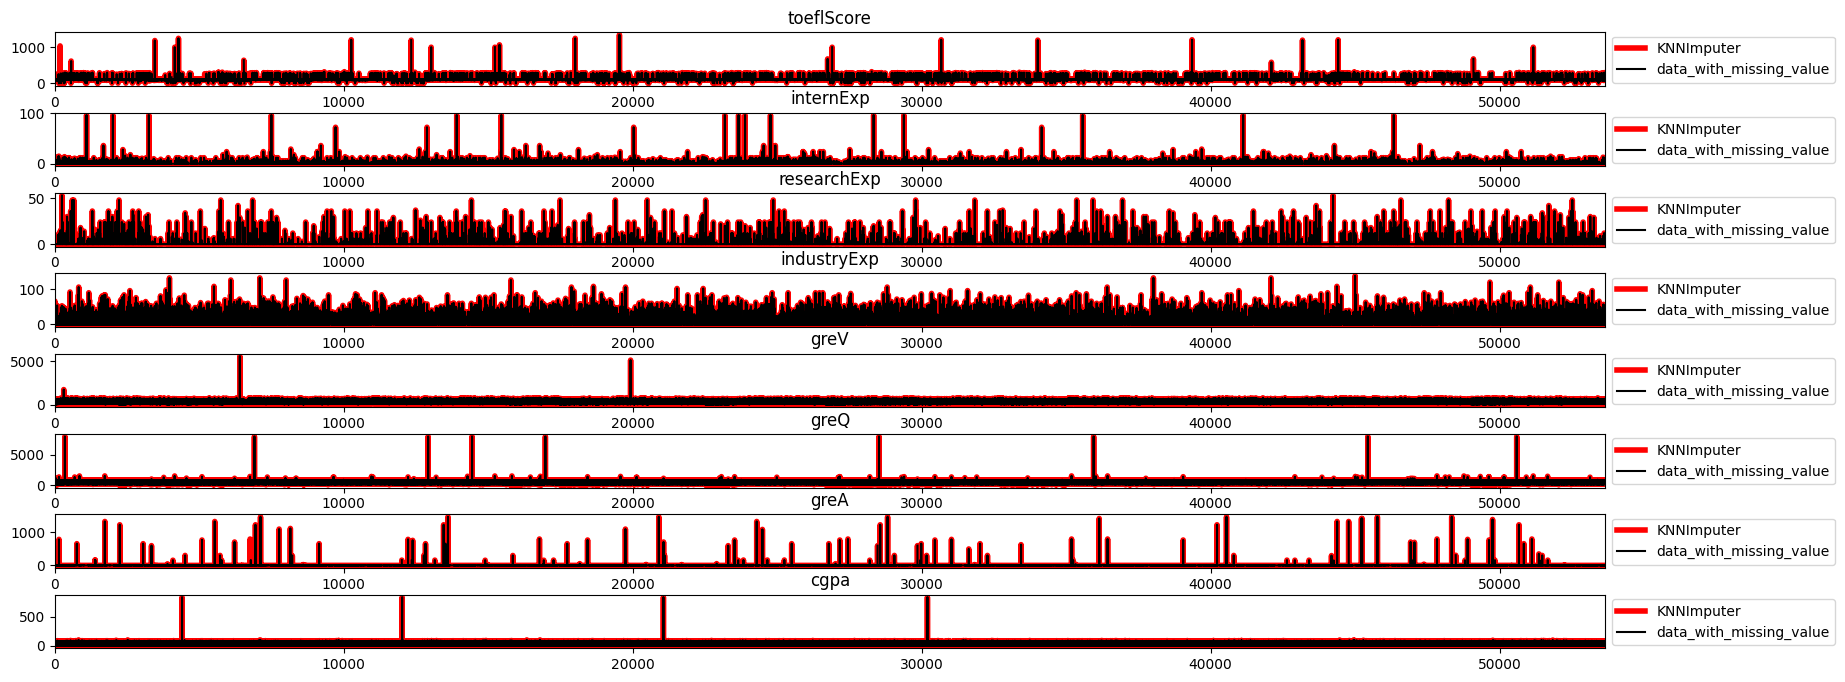

In [ ]:
#Filling missing values for numerical columns
from sklearn.impute import KNNImputer

# remove Nan records
remove_col_df = copy.deepcopy(df)
remove_col_df.drop(['gmatA', 'gmatQ', 'gmatV', 'toeflEssay'], axis = 1, inplace = True)
remove_col_df[['term', 'year']] = remove_col_df['termAndYear'].str.split(' - ', expand=True)
remove_col_df.drop(['termAndYear', 'year'], axis = 1 ,inplace = True)

# clean invalid data in term column
remove_col_df = remove_col_df[(remove_col_df['term'] == 'Fall') | (remove_col_df['term'] == 'Spring') | (remove_col_df['term'] == 'Summer')]
univName
miss_df = copy.deepcopy(remove_col_df)

# Comparing before and after filling out missing values
def plot_series_side_by_side(original, resulting, columns, strategy, compare):
    fig, axs = plt.subplots(len(columns),1,figsize=(20,8))
    axs = axs.flatten()
    custom_xlim = (original.index.min(), original.index.max())
    i = 0
    for c in columns:
        resulting[c].plot(ax=axs[i], title=c, xlabel='', xlim=custom_xlim, label=f'{strategy}', lw=4, color='r')
        original[c].plot(ax=axs[i], title=c, xlabel='', xlim=custom_xlim, label=compare, color='black')
        axs[i].legend(bbox_to_anchor=(1, 1.05))
        i+=1

    fig.subplots_adjust(hspace=0.5)

numerical=['toeflScore','internExp','researchExp', 'industryExp','greV','greQ','greA','cgpa']
imputer = KNNImputer()
for fit in numerical:
    miss_df[[fit]] = imputer.fit_transform(miss_df[[fit]])

plot_series_side_by_side(df, miss_df, ['toeflScore','internExp','researchExp', 'industryExp','greV','greQ','greA','cgpa'], 'KNNImputer', 'data_with_missing_value')

***This block fills missing values for categorical columns in the `miss_df` dataframe using SimpleImputer, using `most_frequent` strategy. It then plots a countplot for each categorical column to compare the original data with the imputed data.***


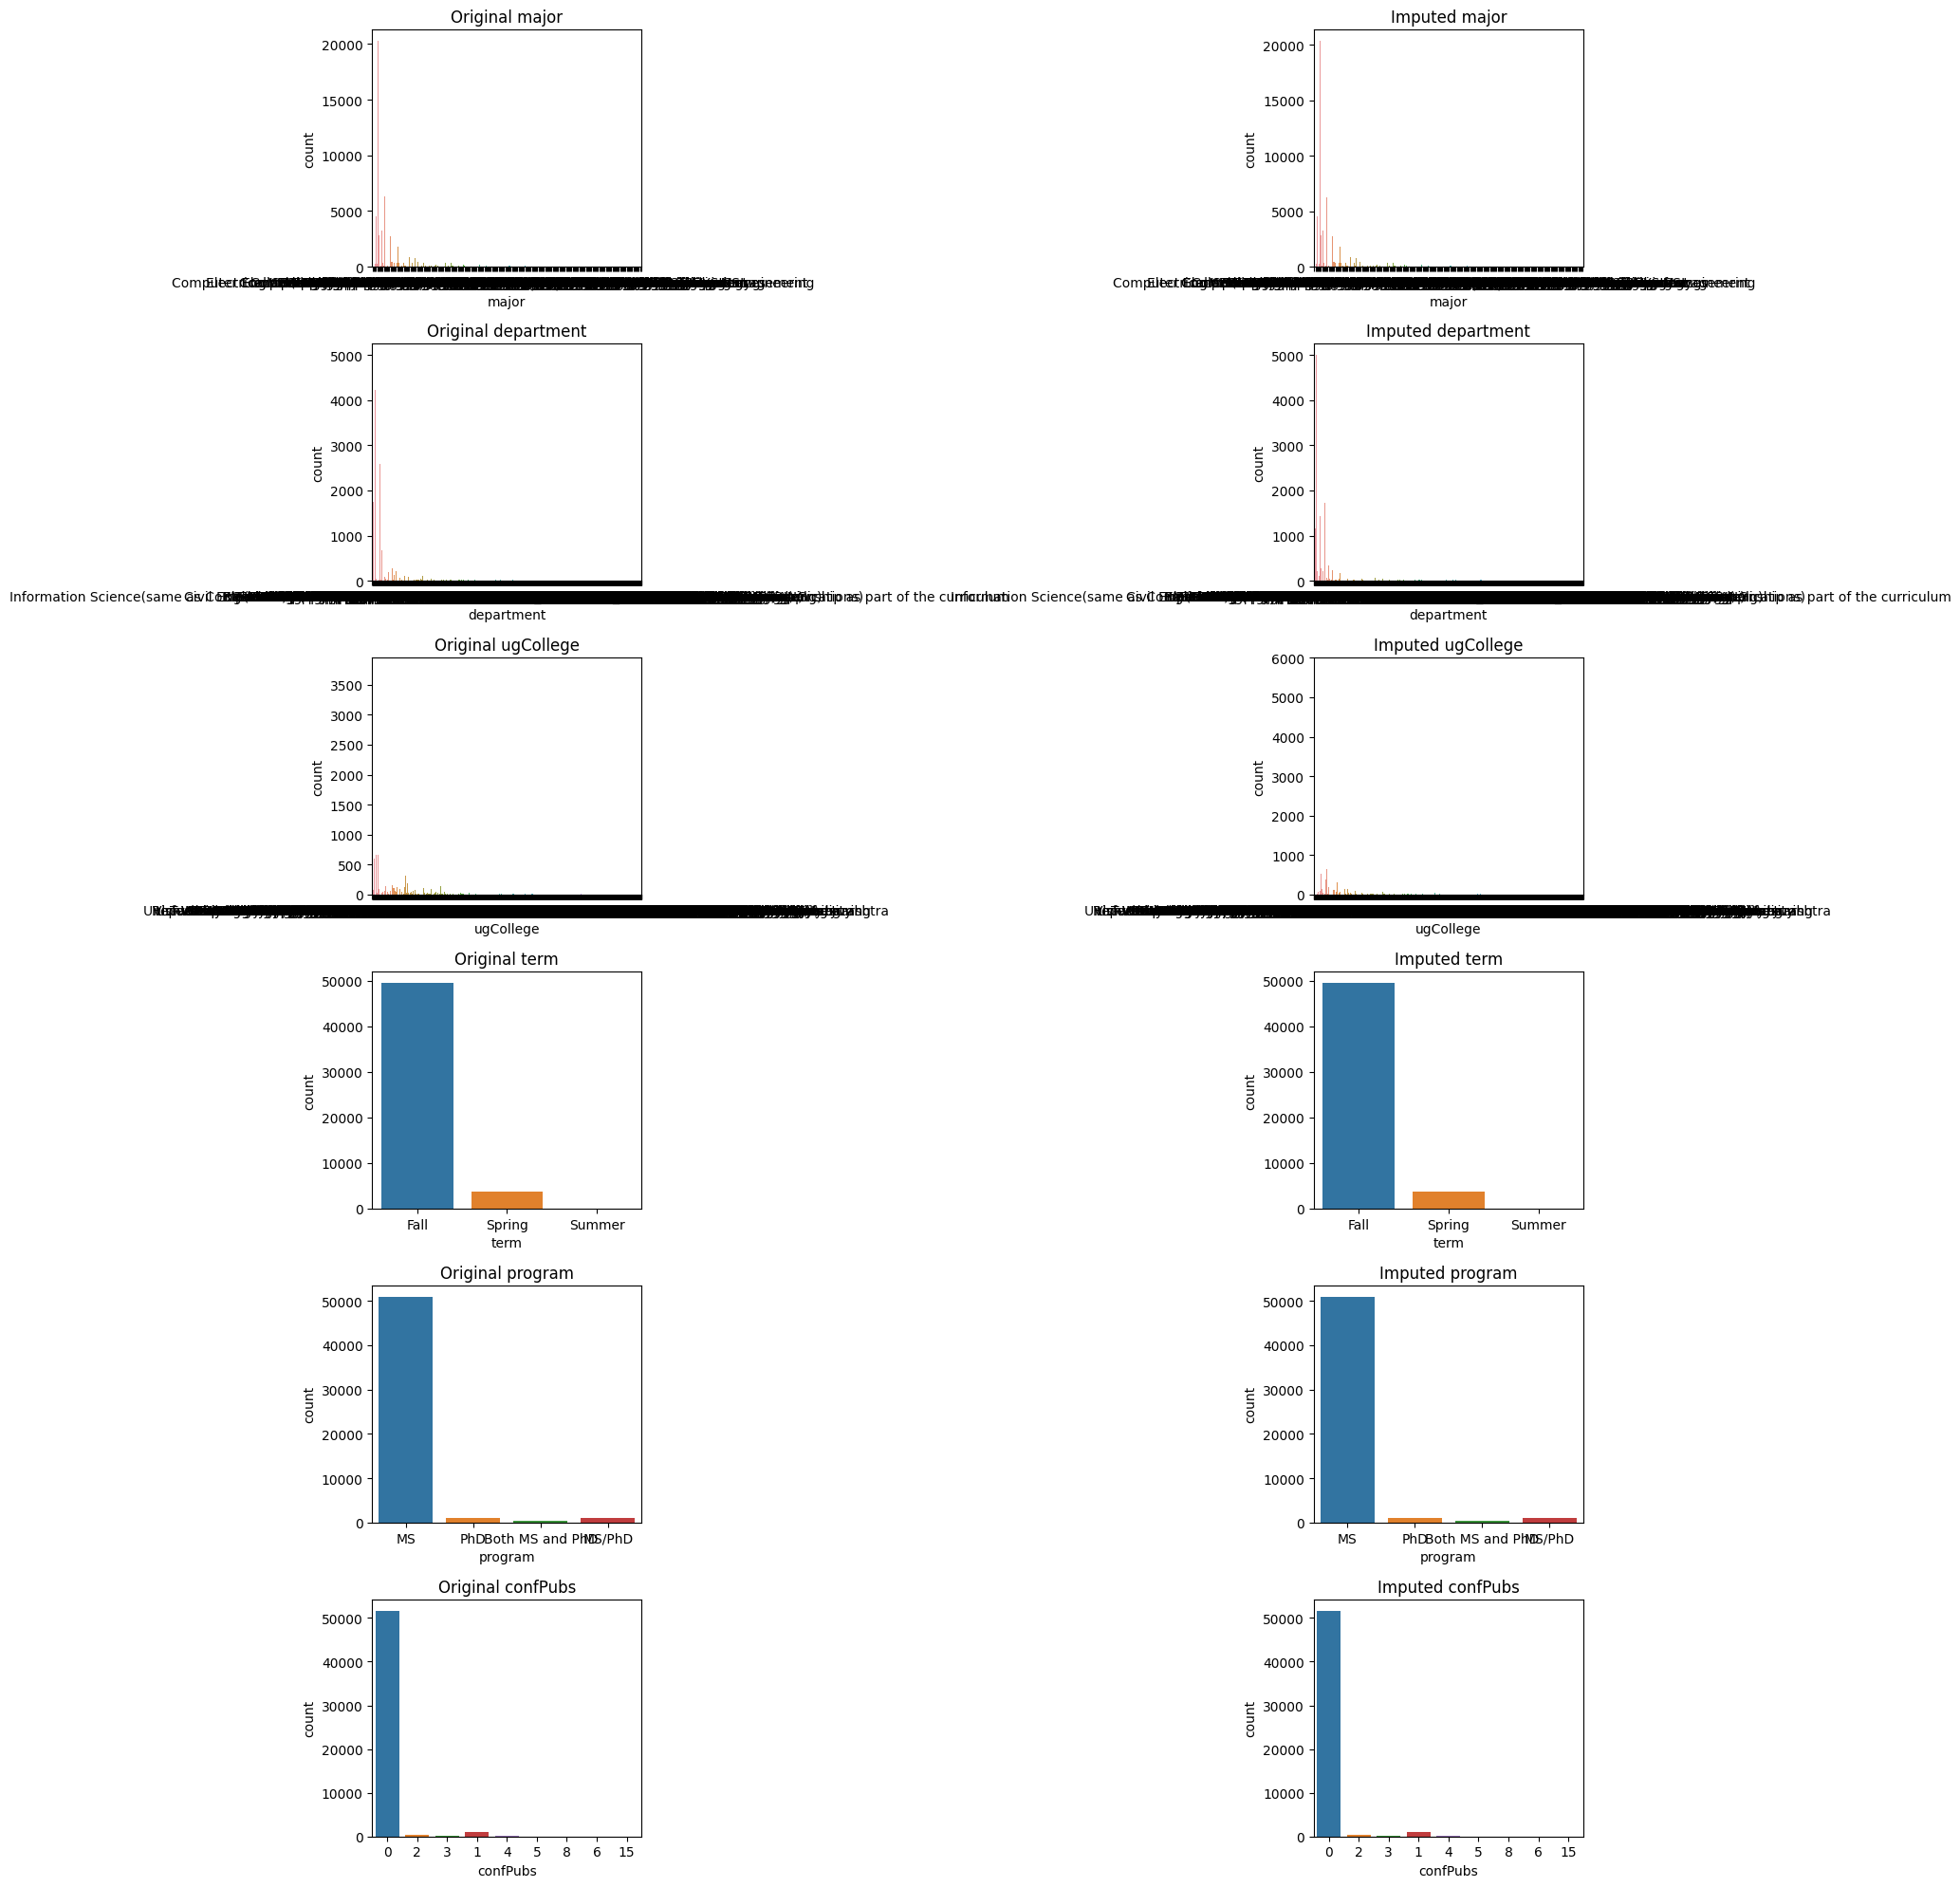

In [ ]:
#Filling missing values for categorical columns
from sklearn.impute import SimpleImputer
import seaborn as sns

categoriacal=['major','department','ugCollege','term','program','confPubs']

imputer = SimpleImputer(strategy='most_frequent')

for fit in categoriacal:
    miss_df[fit] = imputer.fit_transform(miss_df[[fit]])

# Comparing before and after filling out missing values
fig, axs = plt.subplots(len(categoriacal), 2, figsize=(20, 20))
for i, col in enumerate(categoriacal):
    # Plot original data counts
    sns.countplot(x=col, data=remove_col_df, ax=axs[i, 0])
    axs[i, 0].set_title(f'Original {col}')

    # Plot imputed data counts
    sns.countplot(x=col, data=miss_df, ax=axs[i, 1])
    axs[i, 1].set_title(f'Imputed {col}')

plt.tight_layout()
plt.show()

***The code converts the GPAs in the `cgpa` column to a 4.0 scale based on the `cgpaScale` column. If the `cgpaScale` value is 100, it divides the `cgpa` value by 25.0, and if the `cgpaScale` value is 10, it divides the `cgpa` value by 2.5. Finally, the `cgpaScale` column is dropped from the dataframe.***

In [ ]:
# reorder row index and columns
miss_df.reset_index(inplace=True)
target_col = miss_df.pop('admit')
miss_df['admit'] = target_col

# convert GPAs to 4.0 scale based on cgpaScale
miss_df.loc[miss_df['cgpaScale'] == 100, 'cgpa'] = miss_df['cgpa'] / 25.0
miss_df.loc[miss_df['cgpaScale'] == 10, 'cgpa'] = miss_df['cgpa'] / 2.5
miss_df.drop(['cgpaScale'], axis = 1, inplace = True)

miss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53308 entries, 0 to 53307
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            53308 non-null  int64  
 1   userName         53308 non-null  object 
 2   major            53308 non-null  object 
 3   researchExp      53308 non-null  float64
 4   industryExp      53308 non-null  float64
 5   specialization   31938 non-null  object 
 6   toeflScore       53308 non-null  float64
 7   program          53308 non-null  object 
 8   department       53308 non-null  object 
 9   internExp        53308 non-null  float64
 10  greV             53308 non-null  float64
 11  greQ             53308 non-null  float64
 12  userProfileLink  53308 non-null  object 
 13  journalPubs      53308 non-null  object 
 14  greA             53308 non-null  float64
 15  topperCgpa       53308 non-null  float64
 16  confPubs         53308 non-null  object 
 17  ugCollege   

***This block groups the data by the university names and counts the number of students enrolled in each university. Then it creates a bar plot to show the number of students for each university.***

***Same approach for `Program` MS and PhD.***

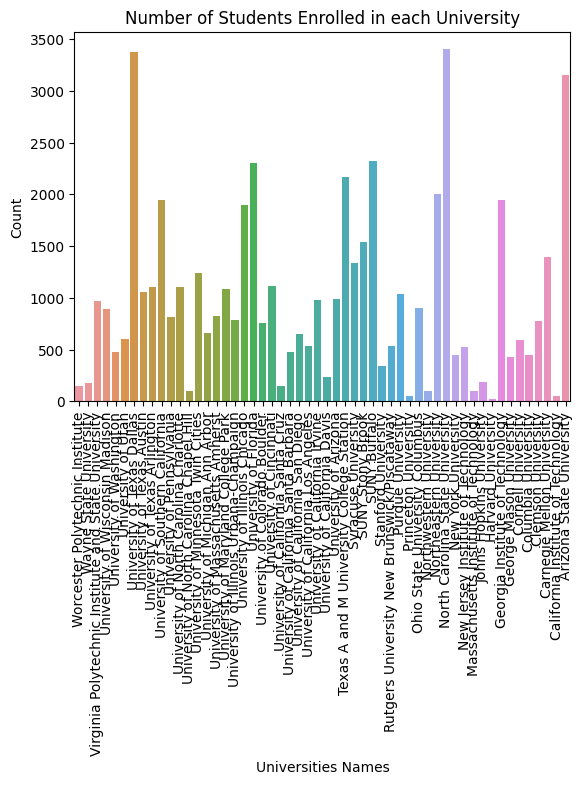

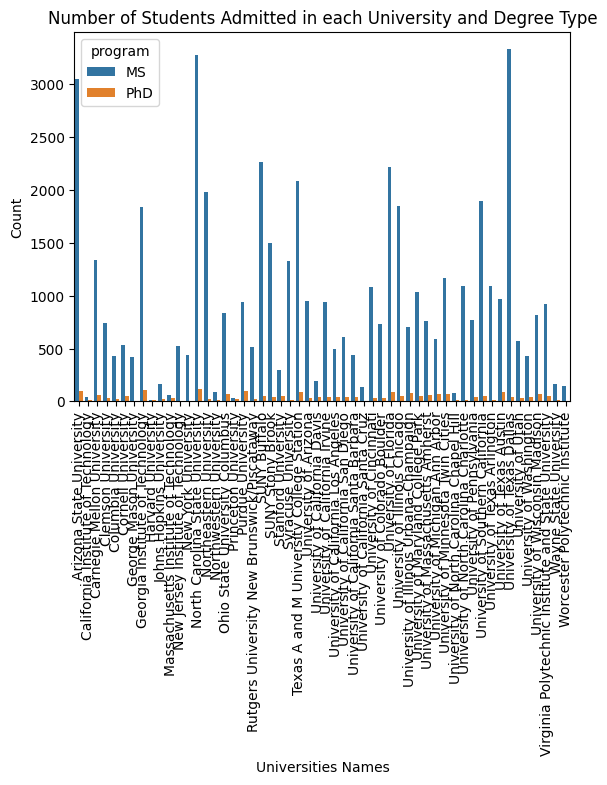

In [ ]:
import seaborn as sns

grouped_df = miss_df.groupby('univName').size()
# print(grouped_df)
count_by_univ = miss_df.groupby(['univName']).size()
# Create a bar plot for each univName
sns.countplot(x='univName', data=miss_df)
plt.title('Number of Students Enrolled in each University')
plt.xlabel('Universities Names')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

miss_df['program'] = miss_df['program'].apply(lambda x: 'PhD' if 'PhD' in x else 'MS')

# Group the data by university and degree type
count_by_univ_degree = miss_df.groupby(['univName', 'program']).size().reset_index(name='count')

# Create a bar plot
sns.barplot(x='univName', y='count', hue='program', data=count_by_univ_degree)
plt.title('Number of Students Admitted in each University and Degree Type')
plt.xlabel('Universities Names')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


***In the histogram plots, we can see some skewed distributions. At first we filled out the NaN values of the remained records. Based on box plot we draw after filling the NaNs, we can see that the data has outliers, because the distribution of the data is centered around one area compare to the range of the variety of data in each column***

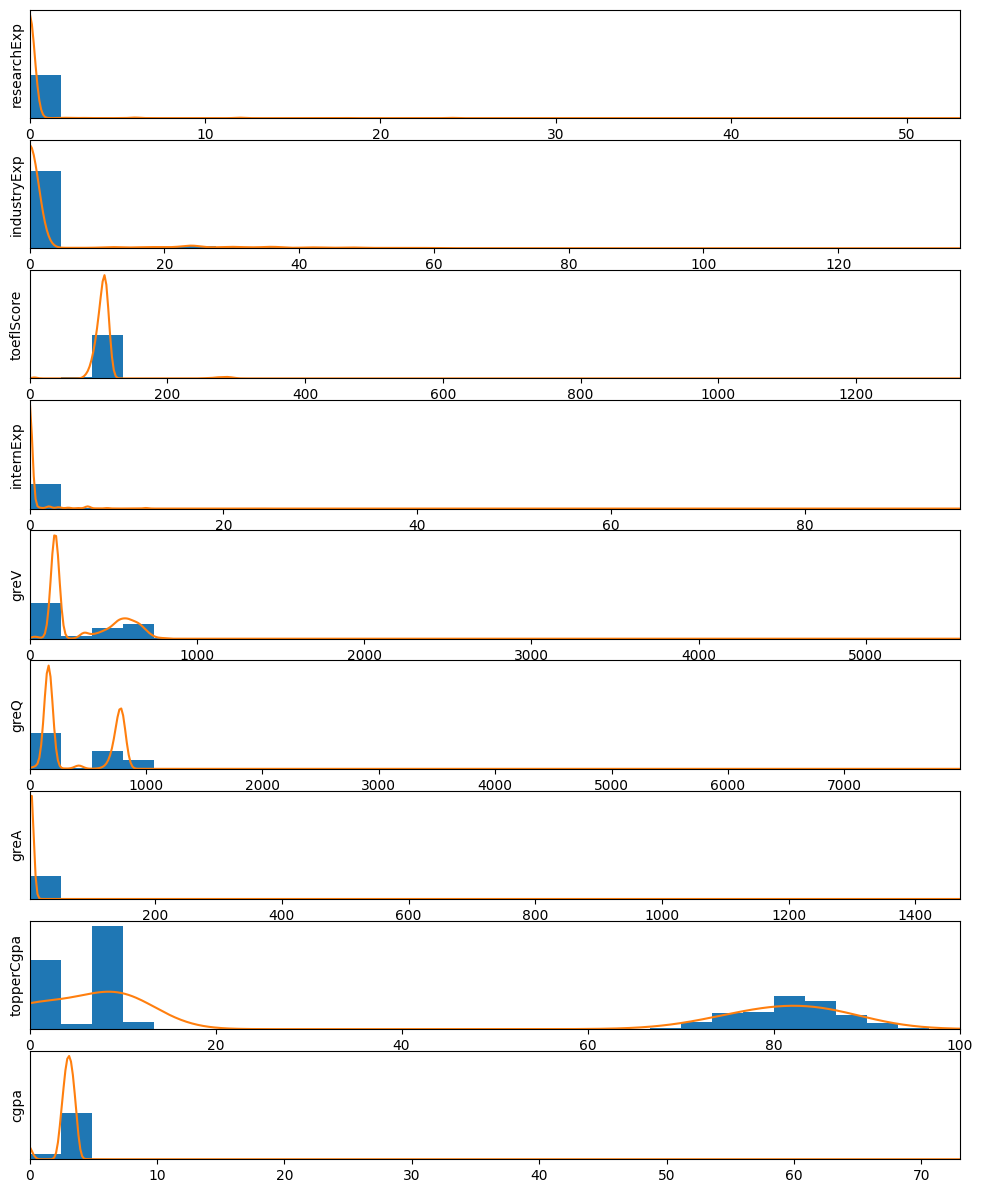

In [ ]:
remove_columns_plt = ['index','userName', 'major', 'specialization', 'program', 'department', 'userProfileLink', 'journalPubs', 'term', 'confPubs', 'ugCollege', 'univName', 'admit']
# Plotting each of the remaining attributes.
plt.figure(figsize = [12,20])
for (axs_counter, attr) in enumerate(miss_df.drop(remove_columns_plt, axis = 1).columns):
  plt.subplot(12, 1, axs_counter + 1)
  plt.hist(miss_df[attr], bins = 30, density = True)
  miss_df[attr].plot.density()
  plt.ylabel(attr)
  plt.yticks([])
  plt.xlim(miss_df[attr].min(), miss_df[attr].max())
plt.show()

***This block defines a function called draw_boxplot that takes a dataset as input and creates a boxplot for each of the remaining attributes in the dataset.
Here we plots the numerical columns, so that we can make an understanding about the data distribution and the outliers.`reasearchExp`, `industryExp`, `toeflScore`, `internExp` and `greA` have so many data points above the wiskers.OUtliers are being viewd in the these columns***

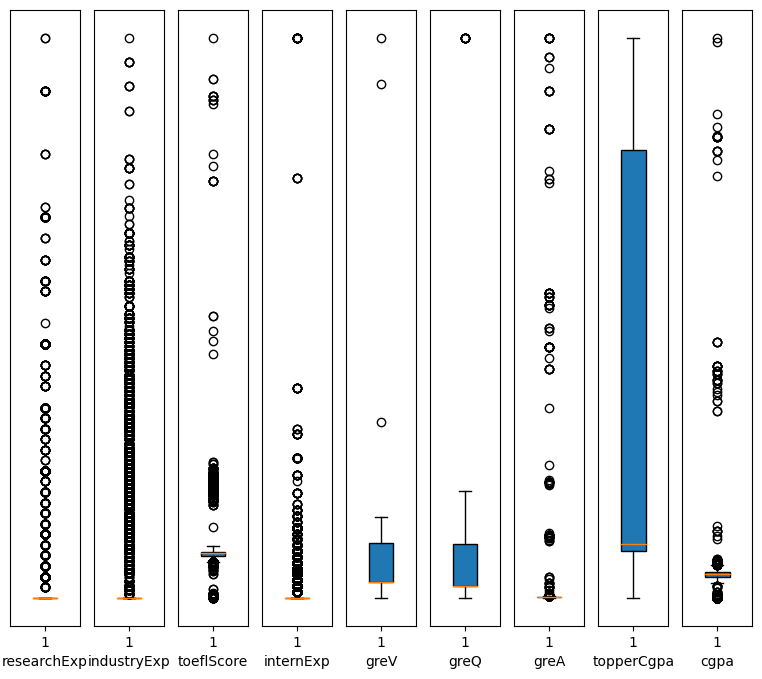

In [ ]:
def draw_boxplot(dataset):
  box_data = copy.deepcopy(dataset)
  # Plotting each of the remaining attributes. The plotting is done using a
  # 'for each' structure with 'enumerate()' to access subplot indices.
  plt.figure(figsize = [15,8])
  for (i, attr) in enumerate(box_data.columns):
    plt.subplot(1, 14, i + 1)
    plt.boxplot(box_data[attr], widths=0.35, patch_artist=True)
    plt.xlabel(attr)
    plt.yticks([])
  plt.show()

draw_boxplot(miss_df.drop(remove_columns_plt, axis = 1))

***This block is performing outlier removal using the IQR (Interquartile Range) method.The iqr_lim_replacement function applies this outlier removal to specified columns by replacing values outside the range with their respective min/max values. We decided to keep the outliers for `researchExp`, `industryExp`, `internExp` columns as they are having valuable informatin, most of the experiences are zero, so most of the outliers showing in the box plot are reasonable.***

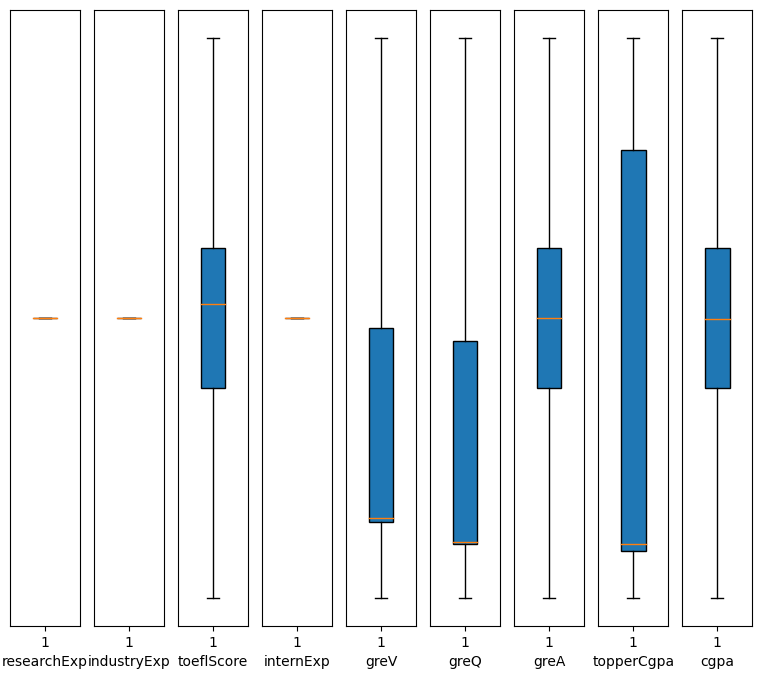

In [ ]:
outlier_df = copy.deepcopy(miss_df)

def get_lim(dataset, column):
  # finding the 1st and 3rd quartiles for each column
  qmin = dataset[column].quantile(0.25)
  qmax = dataset[column].quantile(0.75)
  # calculating the range for identifying outliers
  limmin = qmin - 1.5 * (qmax - qmin)
  limmax = qmax + 1.5 * (qmax - qmin)
  return limmin, limmax

#Baseline
def iqr_lim_replacement(dataset, columns):
  for column in columns:
    limmin, limmax = get_lim(dataset, column)
    # changing the values outside the range with their respective min/max values
    dataset[column] = np.where(dataset[column] >= limmax, limmax, np.where(dataset[column] <= limmin, limmin, dataset[column]))

iqrlim_data = copy.deepcopy(outlier_df)
iqr_lim_replacement(iqrlim_data, ['toeflScore','greV', 'greQ', 'greA','topperCgpa', 'cgpa','researchExp', 'industryExp', 'internExp'])

remove_columns_plt = ['index','userName', 'major', 'specialization', 'program', 'department', 'userProfileLink', 'journalPubs', 'term', 'confPubs', 'ugCollege', 'univName', 'admit']
draw_boxplot(iqrlim_data.drop(remove_columns_plt,axis = 1))

***This block is performing feature selection using a random forest classifier before one-hot encoding the categorical features.***

***Then we are using random forest classifier to selected feature columns and the target column `admit`. It then calculates feature importances based on the trained model. We first decided to perform feature selection for our numerical columns.***

In [ ]:
#Feature selection before one hot encoding
from sklearn.ensemble import RandomForestClassifier

before_hot_df = copy.deepcopy(iqrlim_data)
exclude_cols = ['index','userName', 'specialization', 'userProfileLink', 'journalPubs', 'confPubs', 'major','department','ugCollege','term','program','confPubs','univName' , 'admit']

# # Select all columns except the ones to exclude
feature_cols = [col for col in before_hot_df.columns if col not in exclude_cols]

# Train a random forest classifier to rank feature importances
rfc = RandomForestClassifier()
rfc.fit(before_hot_df[feature_cols], before_hot_df['admit'])
importances = rfc.feature_importances_

# Select the top N features based on their importance scores
N = 20
selected_cols = [feature_cols[i] for i in np.argsort(importances)[::-1][:N]]

***In this block of code we are plotting the correlation between different columns. There is one very strong correleations between `greV` and `greQ`.***

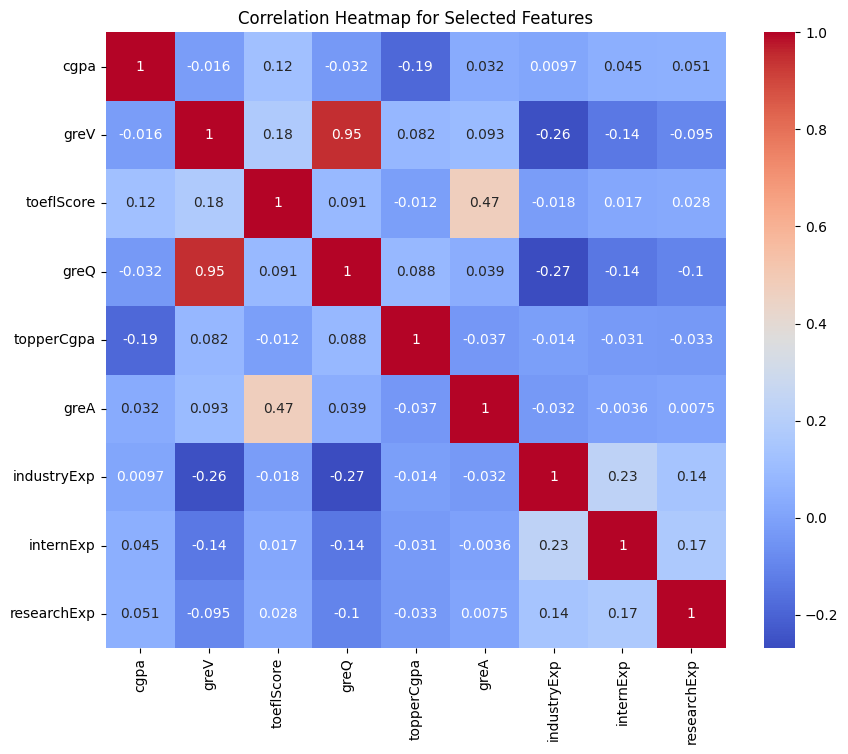

In [ ]:
import seaborn as sns

columns = selected_cols
# Create a new dataframe with only the selected columns
selected_df = before_hot_df[columns]


# Create a correlation matrix
corr_matrix = selected_df.corr()

# Create a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Selected Features')
plt.show()

***It applies one-hot encoding to the categorical columns `major`, `program`, `department`, `ugCollege`, `univName`, and `term`. Next, we selected the numerical columns to be scaled by excluding the columns that were just one-hot encoded and other non-numerical columns such as `index`, `userName`, `specialization`, `userProfileLink`, `journalPubs`, `confPubs`, and `admit`.***

***Finally, applied quantile transformation to the selected columns using `QuantileTransformer`***

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, QuantileTransformer

# Discretizing
disc_df = before_hot_df.copy()
disc_df = pd.get_dummies(disc_df, columns=['major', 'program', 'department', 'ugCollege', 'univName', 'term'], drop_first=True)

# Scale the selected columns
exclude_cols = ['index', 'userName', 'specialization', 'userProfileLink', 'journalPubs', 'confPubs', 'admit']
cols_to_scale = disc_df.columns.difference(exclude_cols)
scaler = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='uniform')
cleaned_df = disc_df.copy()
recommend_df = copy.deepcopy(cleaned_df)
cleaned_df[cols_to_scale] = scaler.fit_transform(cleaned_df[cols_to_scale])

***Here we are performing feature selection using Recursive Feature Elimination aproach. We reduce dimensionality based on this result to improve the model performance and increasing generalization.***

***Then training a Random Forest Classifier on the remaining columns and ranks the importance of each feature.***

In [ ]:
#Feature selection after one hot encoding
from sklearn.ensemble import RandomForestClassifier

dataset = copy.deepcopy(cleaned_df)
exclude_cols = ['index','userName', 'specialization', 'userProfileLink', 'journalPubs', 'confPubs', 'admit']

# # Select all columns except the ones to exclude
feature_cols = [col for col in dataset.columns if col not in exclude_cols]

# Train a random forest classifier to rank feature importances
rfc = RandomForestClassifier()
rfc.fit(dataset[feature_cols], dataset['admit'])
importances = rfc.feature_importances_

# Select the top N features based on their importance scores
N = 50
selected_cols = [feature_cols[i] for i in np.argsort(importances)[::-1][:N]]

***We combine the selected features from numerical columns and the features that are selected after encoding categorical columns.***

In [ ]:
# Keep the important features
dummy_df = copy.deepcopy(dataset)
total_cols = list(set(['cgpa', 'greV', 'toeflScore', 'topperCgpa', 'greQ', 'greA', 'internExp', 'industryExp', 'researchExp'] + selected_cols))
main_df = dummy_df.loc[:, total_cols]

admit_col = dummy_df['admit']
main_df = pd.concat([main_df, admit_col], axis=1)

***In this block of code we are plotting the correlation between different columns. There are two very strong correleations.***

***This block provides a useful way to visualize the pairwise correlations between different columns in a dataframe, which can help in identifying relationships and patterns in the data.***

<Axes: >

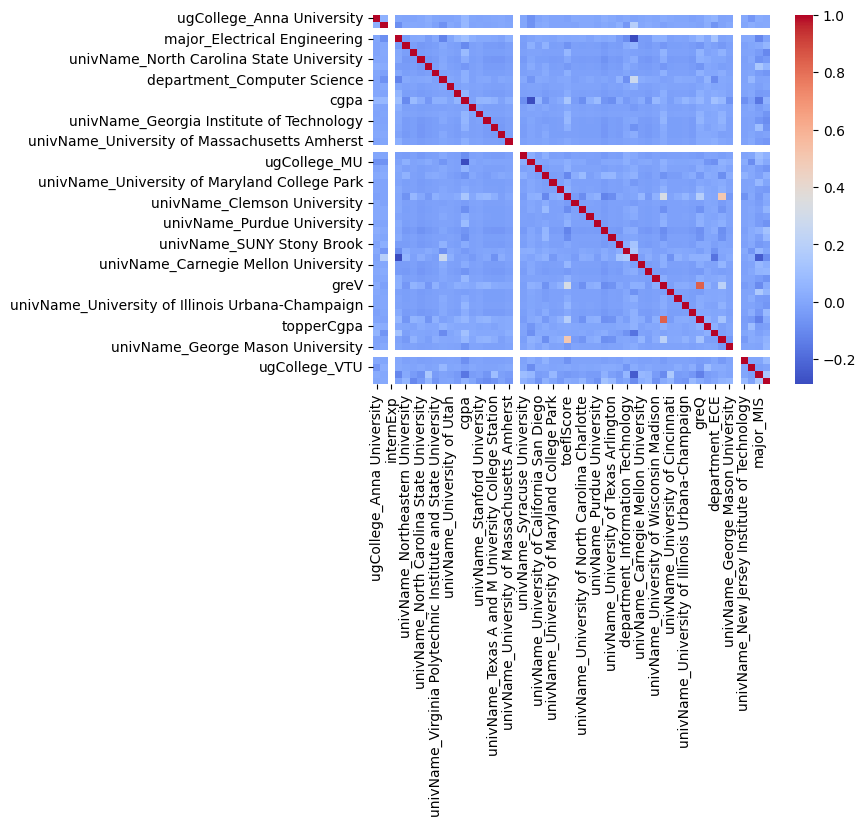

In [ ]:
import seaborn as sns

# Create a correlation matrix
corr_matrix = main_df.corr()

# Create a heatmap
sns.heatmap(corr_matrix, cmap='coolwarm')

***Testing Accuracy is basically the actual accuracy of the model and based on those accuracies, we have found the highest and that model we will be feeding to voting.***
***In the following blocks of codes, we try hyper tune for multiple models and explore their best hyper parameters. We plot the result and then use what we observe to create and train the models.
After that we compare the scores of each model together on a bar plot. Showing the best model.***

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data to test and train dataset
X_train = main_df.drop(['admit'], axis = 1)
Y_train = main_df['admit']

x_train, y_train = shuffle(X_train, Y_train, random_state=42)

# Setting Training Data ratio to 80% and Testing 20%
train_ratio = 0.80
test_ratio = 0.20

# Splitting Training & Testing Data
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = test_ratio, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

# Hyper parameter tuning
models_scores = pd.DataFrame()
# exploring hyper parameters for knn
neighbors = [5, 10, 15, 250]
metrics = ['manhattan', 'euclidean']

for neighbor in neighbors:
  for metric in metrics:
    model = KNeighborsClassifier(n_neighbors=neighbor, metric=metric)
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    cross_score = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    models_scores[f'KNN_{metric}_{neighbor}_Neighbor'] = cross_score

***Plotting different neighbor numbers and different metrics so that we can compare which are better. Here we understand that n_neighbor = 15 with metrics "manhattan" have the best scores.***

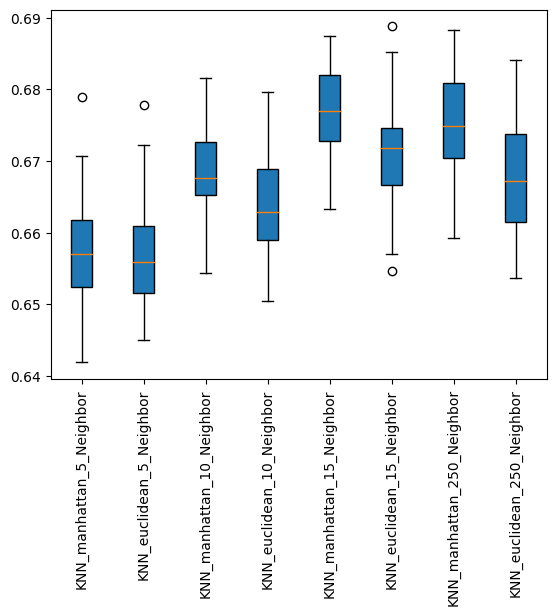

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(models_scores, labels = models_scores.columns, widths=0.35, patch_artist=True)
plt.xticks(rotation=90)
plt.show()

***Here we can observe that the C = 1 is the best value to use for creating and training LogisticRegression model here. The model is trained and evaluated on multiple subsets of the data with different hyperparameters. The best set of hyperparameters is then selected based on the performance metric.***

Best value of C: 1000


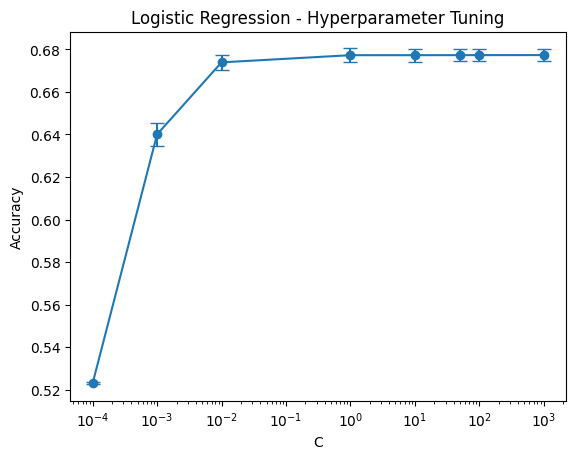

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Hyper parameter tuning
param_grid = {'C': [0.0001, 0.001, 0.01, 1, 10, 50, 100, 1000]}
model = LogisticRegression()
lgr_grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
lgr_grid.fit(x_train, y_train)

print("Best value of C:", lgr_grid.best_params_['C'])

Cs = [x['C'] for x in lgr_grid.cv_results_['params']]
mean_scores = lgr_grid.cv_results_['mean_test_score']
stds = lgr_grid.cv_results_['std_test_score']

plt.errorbar(Cs, mean_scores, yerr=stds, fmt='o-', capsize=5)
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.title('Logistic Regression - Hyperparameter Tuning')
plt.show()

***Here we can observe that the C = 0.01 is the best value to use for creating and training SVM model here. The model is trained and evaluated on multiple subsets of the data with different hyperparameters. The best set of hyperparameters is then selected based on the performance metric.***

Best value of C: 10


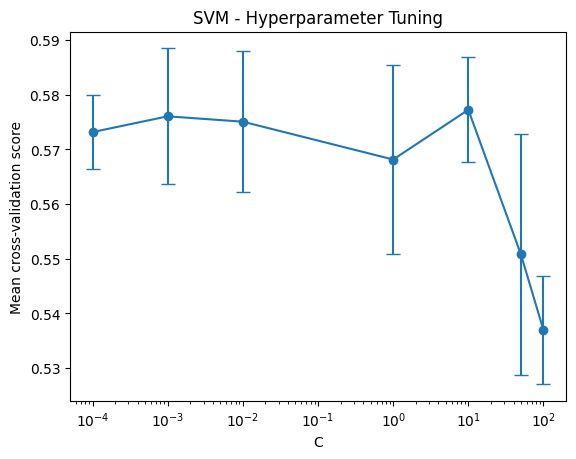

In [ ]:
from sklearn.svm import SVC
from sklearn.exceptions import ConvergenceWarning
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Hyper parameter tuning
param_grid = {'C': [0.0001, 0.001, 0.01, 1, 10, 50, 100], 'kernel': ['rbf'],
              'max_iter': [5000]}
svm = SVC()
svm_grid = GridSearchCV(svm, param_grid, cv=5)
svm_grid.fit(x_train, y_train)

warnings.filterwarnings("default", category=ConvergenceWarning)
print("Best value of C:", svm_grid.best_params_['C'])
# mean cross-validation scores and standard deviations for each value of C
means = svm_grid.cv_results_['mean_test_score']
stds = svm_grid.cv_results_['std_test_score']

# mean cross-validation scores as a function of C
plt.errorbar(param_grid['C'], means, yerr=stds, fmt='o-', capsize=5)
plt.xlabel('C')
plt.ylabel('Mean cross-validation score')
plt.xscale('log')
plt.title('SVM - Hyperparameter Tuning')
plt.show()



***Here we can observe that the C = 100 is the best value to use for creating and training LinearSVC model here. The model is trained and evaluated on multiple subsets of the data with different hyperparameters. The best set of hyperparameters is then selected based on the performance metric.***

Best value of C: 100.0


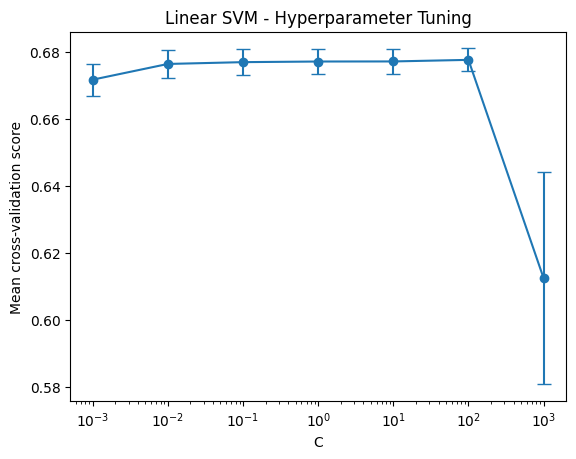

In [ ]:
from sklearn.svm import LinearSVC
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Hyper parameter tuning
param_grid = {'C': np.logspace(-3, 3, 7)}
svm = LinearSVC(max_iter=5000, tol=1e-5)
svm_ln_grid = GridSearchCV(svm, param_grid, cv=5)
svm_ln_grid.fit(x_train, y_train)

warnings.filterwarnings("default", category=ConvergenceWarning)

print("Best value of C:", svm_ln_grid.best_params_['C'])

means = svm_ln_grid.cv_results_['mean_test_score']
stds = svm_ln_grid.cv_results_['std_test_score']

plt.errorbar(param_grid['C'], means, yerr=stds, fmt='o-', capsize=5)
plt.xlabel('C')
plt.ylabel('Mean cross-validation score')
plt.xscale('log')
plt.title('Linear SVM - Hyperparameter Tuning')
plt.show()

***Here we can observe that the alpha = 0.001 is the best value to use for creating and training SGDClassifier model here. The model is trained and evaluated on multiple subsets of the data with different hyperparameters. The best set of hyperparameters is then selected based on the performance metric.***

Best alpha: 0.001


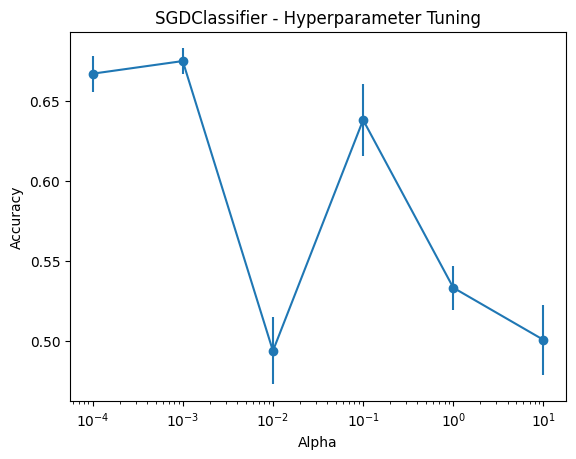

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

# Hyper parameter tuning
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10]}
model = SGDClassifier(loss="squared_error", penalty="l2", max_iter=1000)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_result = grid_search.fit(x_train, y_train)

results = grid_search.cv_results_
alphas = results['param_alpha'].data.astype(float)
mean_scores = results['mean_test_score']
stds = results['std_test_score']

print("Best alpha:", grid_search.best_params_['alpha'])
# Plot the results
plt.errorbar(alphas, mean_scores, yerr=stds, fmt='o-')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('SGDClassifier - Hyperparameter Tuning')
plt.show()

In [ ]:
models_bar = {}

***The code is fitting a KNN (K-Nearest Neighbors) classifier with 15 neighbors and the "manhattan" distance metric. It is then making predictions on the test data using this trained model and calculating various performance metrics such as accuracy, sensitivity, specificity, precision, and F1-score.***

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

#fiting the model KNN Classifier with manhattan metric and 15 n_neighbors
model = KNeighborsClassifier(n_neighbors=15, metric="manhattan")
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
train_pred =  model.predict(x_train)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'KNN Classifier')
print(f' Training Accuracy: {accuracy_score(y_train, train_pred)}','and Training Error:',1-accuracy_score(y_train,train_pred))
print(f' Testing Accuracy: {accuracy_score(y_test, y_pred)}','and Testing Error:',1-accuracy_score(y_test, y_pred))
print(" Sensitivity:", sensitivity)
print(" Specificity:", specificity)
print(f' Testing Recall: {recall_score(y_test, y_pred)}')
print(f' Testing Precesion: {precision_score(y_test, y_pred)}')
print(f' Testing F-1: {f1_score(y_test, y_pred)}')
models_bar[f'KNN_score'] = model.score(x_test,y_test)
print('-'*100)

KNN Classifier
 Training Accuracy: 0.730314683674905 and Training Error: 0.26968531632509496
 Testing Accuracy: 0.6731382479834928 and Testing Error: 0.32686175201650725
 Sensitivity: 0.7030797101449275
 Specificity: 0.6409957215091404
 Testing Recall: 0.7030797101449275
 Testing Precesion: 0.677667190501135
 Testing F-1: 0.690139592780297
----------------------------------------------------------------------------------------------------


In [ ]:
models_bar[f'KNN_score'] = model.score(x_test,y_test)

***A Linear Support Vector Classification (LinearSVC) algorithm with hyperparameters set to C=100, max_iter=12000, and tol=1e-5. It then fits the model on the training data and makes predictions on the test data. Performance metrics including accuracy, sensitivity, specificity, precision, and F1 score are then calculated on the predicted values.***

In [ ]:
# LinearSVC with C = 100
best_linear = LinearSVC(C=100, max_iter=12000, tol=1e-5)
best_linear.fit(x_train, y_train)

# Predict with the best C
y_pred = best_linear.predict(x_test)
# Evaluate
train_pred = best_linear.predict(x_train)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'LinearSVC')
print(f' Training Accuracy: {accuracy_score(y_train, train_pred)}','and Training Error:',1-accuracy_score(y_train,train_pred))
print(f' Testing Accuracy: {accuracy_score(y_test, y_pred)}','and Testing Error:',1-accuracy_score(y_test, y_pred))
print(" Sensitivity:", sensitivity)
print(" Specificity:", specificity)
print(f' Testing Recall: {recall_score(y_test, y_pred)}')
print(f' Testing Precesion: {precision_score(y_test, y_pred)}')
print(f' Testing F-1: {f1_score(y_test, y_pred)}')
models_bar[f'LinearSVC_score'] = best_linear.score(x_test,y_test)
print('-'*100)

LinearSVC
 Training Accuracy: 0.6750691741312198 and Training Error: 0.3249308258687802
 Testing Accuracy: 0.6625398611892703 and Testing Error: 0.33746013881072967
 Sensitivity: 0.6952898550724638
 Specificity: 0.6273823415013613
 Testing Recall: 0.6952898550724638
 Testing Precesion: 0.6670142509558568
 Testing F-1: 0.6808586127372716
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
models_bar[f'LinearSVC_score'] = best_linear.score(x_test,y_test)

***This code is using the support vector machine (SVM) algorithm with a linear kernel and a regularization parameter of C=10 to classify data. The code trains the SVM model using the training data (x_train and y_train) and then uses it to predict the labels for the test data (x_test). The code then evaluates the performance of the SVM model using various metrics such as accuracy, sensitivity, specificity, precision, and F1 score.***

In [ ]:
# LinearSVC with C = 10
best_SVC = SVC(C=10, max_iter=12000)
best_SVC.fit(x_train, y_train)

# Predict with the best C
y_pred = best_SVC.predict(x_test)
# Evaluate
train_pred = best_SVC.predict(x_train)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'SVC')
print(f' Training Accuracy: {accuracy_score(y_train, train_pred)}','and Training Error:',1-accuracy_score(y_train,train_pred))
print(f' Testing Accuracy: {accuracy_score(y_test, y_pred)}','and Testing Error:',1-accuracy_score(y_test, y_pred))
print(" Sensitivity:", sensitivity)
print(" Specificity:", specificity)
print(f' Testing Recall: {recall_score(y_test, y_pred)}')
print(f' Testing Precesion: {precision_score(y_test, y_pred)}')
print(f' Testing F-1: {f1_score(y_test, y_pred)}')
models_bar[f'SVC_score'] = best_SVC.score(x_test,y_test)
print('-'*100)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=12000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC
 Training Accuracy: 0.6944379308727665 and Training Error: 0.3055620691272335
 Testing Accuracy: 0.6557869067717126 and Testing Error: 0.3442130932282874
 Sensitivity: 0.6844202898550724
 Specificity: 0.6250486192143135
 Testing Recall: 0.6844202898550724
 Testing Precesion: 0.6621100595864002
 Testing F-1: 0.6730803491893818
----------------------------------------------------------------------------------------------------


In [ ]:
models_bar[f'SVC_score'] = best_SVC.score(x_test,y_test)

***This code is fitting a Logistic Regression model with regularization parameter C=1 on the training data x_train and y_train.The evaluation metrics such as precision, recall, specificity, and f1 score are computed.***

In [ ]:
# Logistic Regression
model = LogisticRegression(C=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
train_pred = model.predict(x_train)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'LogisticRegression')
print(f' Training Accuracy: {accuracy_score(y_train,train_pred)}','and Training Error:',1-accuracy_score(y_train,train_pred))
print(f' Testing Accuracy: {accuracy_score(y_test, y_pred)}','and Testing Error:',1-accuracy_score(y_test, y_pred))
print(" Sensitivity:", sensitivity)
print(" Specificity:", specificity)
print(f' Testing Recall: {recall_score(y_test, y_pred)}')
print(f' Testing Precesion: {precision_score(y_test, y_pred)}')
print(f' Testing F-1: {f1_score(y_test, y_pred)}')
models_bar[f'LogisticRegression_score'] = model.score(x_test,y_test)
print('-'*100)


LogisticRegression
 Training Accuracy: 0.6782582188247432 and Training Error: 0.32174178117525676
 Testing Accuracy: 0.6698555618082911 and Testing Error: 0.3301444381917089
 Sensitivity: 0.6978260869565217
 Specificity: 0.6398288603656165
 Testing Recall: 0.6978260869565217
 Testing Precesion: 0.6753155680224404
 Testing F-1: 0.6863863150392017
----------------------------------------------------------------------------------------------------


In [ ]:
models_bar[f'LogisticRegression_score'] = model.score(x_test,y_test)

***The code is performing machine learning classification on a dataset using various classification algorithms such as Decision Tree, Random Forest, XGBoost, and Naive Bayes. It trains these models on the training data and then evaluates their performance using various metrics such as accuracy, sensitivity, specificity, precision, and F1 score on the testing data.***

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV,StratifiedKFold

models = {
      "Decision Tree Classifier": DecisionTreeClassifier(),
      "Random Forrest Classifier": RandomForestClassifier(),
      "Xtreme Gradient Boosting": XGBClassifier(),
      "Naive Bayes Classifier": GaussianNB(),
}

# training each of the models and calculationg metrics
for name, model in models.items():
    print(f'\nTraining and Error Metric Calculation for {name} Model\n')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    f1 = f1_score(y_test, y_pred)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    print(f' Training Accuracy: {accuracy_score(y_train,train_pred)}','and Training Error:',1-accuracy_score(y_train,train_pred))
    print(f' Testing Accuracy: {accuracy_score(y_test, y_pred)}','and Testing Error:',1-accuracy_score(y_test, y_pred))
    print(" Sensitivity:", sensitivity)
    print(" Specificity:", specificity)
    print(f' Testing Recall: {recall_score(y_test, y_pred)}')
    print(f' Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f' Testing F-1: {f1_score(y_test, y_pred)}')
    models_bar[f'{name}_score'] = model.score(x_test,y_test)
    print('-'*100)


Training and Error Metric Calculation for Decision Tree Classifier Model

 Training Accuracy: 0.9809829761290625 and Training Error: 0.01901702387093751
 Testing Accuracy: 0.629806790470831 and Testing Error: 0.370193209529169
 Sensitivity: 0.6309782608695652
 Specificity: 0.6285492026448852
 Testing Recall: 0.6309782608695652
 Testing Precesion: 0.6458371963656592
 Testing F-1: 0.6383212682122239
----------------------------------------------------------------------------------------------------

Training and Error Metric Calculation for Random Forrest Classifier Model

 Training Accuracy: 0.9809829761290625 and Training Error: 0.01901702387093751
 Testing Accuracy: 0.7006190208216094 and Testing Error: 0.29938097917839057
 Sensitivity: 0.7157608695652173
 Specificity: 0.6843640606767795
 Testing Recall: 0.7157608695652173
 Testing Precesion: 0.7088266953713671
 Testing F-1: 0.7122769064359114
-------------------------------------------------------------------------------------------

***This code trains a stochastic gradient descent classifier with the best hyperparameters on the training data and then uses it to predict the target variable for the test data. The performance of the classifier is then evaluated using various metrics such as accuracy, sensitivity, specificity, precision, recall, and F-1 score.***

In [ ]:
from sklearn.linear_model import SGDClassifier

best_sgd = SGDClassifier(alpha= 0.001, loss="squared_error", penalty="l2", max_iter=1000)
best_sgd.fit(x_train, y_train)

# Predict with the best alpha
y_pred = best_sgd.predict(x_test)
# Evaluate
train_pred = best_sgd.predict(x_train)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print(f'SGDClassifier')
print(f' Training Accuracy: {accuracy_score(y_train, train_pred)}','and Training Error:',1-accuracy_score(y_train,train_pred))
print(f' Testing Accuracy: {accuracy_score(y_test, y_pred)}','and Testing Error:',1-accuracy_score(y_test, y_pred))
print(" Sensitivity:", sensitivity)
print(" Specificity:", specificity)
print(f' Testing Recall: {recall_score(y_test, y_pred)}')
print(f' Testing Precesion: {precision_score(y_test, y_pred)}')
print(f' Testing F-1: {f1_score(y_test, y_pred)}')
models_bar[f'SGD_score'] = best_sgd.score(x_test,y_test)
print('-'*100)

SGDClassifier
 Training Accuracy: 0.6712470102705999 and Training Error: 0.32875298972940015
 Testing Accuracy: 0.6644156818608141 and Testing Error: 0.3355843181391859
 Sensitivity: 0.6764492753623188
 Specificity: 0.6514974718008557
 Testing Recall: 0.6764492753623188
 Testing Precesion: 0.6757148027506333
 Testing F-1: 0.6760818395799384
----------------------------------------------------------------------------------------------------


In [ ]:
models_bar[f'SGD_score'] = best_sgd.score(x_test,y_test)

***This code is for plotting all the different model scores together. Here we observe that Xtreme Gradient Boosting model has the best score comparing to other models.***

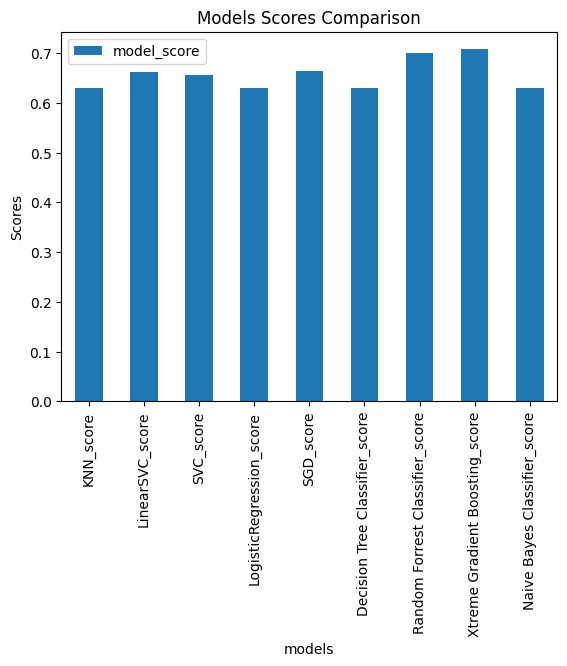

In [ ]:
df = pd.DataFrame.from_dict(models_bar, orient='index', columns=['model_score'])

# Plot a bar chart of different model scores
df.plot(kind='bar')
plt.xlabel('models')
plt.ylabel('Scores')
plt.title('Models Scores Comparison')
plt.show()

***Based on the exploration, the Xtreme Gradient Boosting Model has the highest testing accuracy, recall, precision, and F1-score among all the models, which suggests that it is the best performing model for the given dataset. The Random Forrest Classifier Model follows closely behind in terms of testing accuracy, recall, precision, and F1-score. The KNN Classifier and Logistic Regression have lower testing accuracy, recall, precision, and F1-score than the first two models. <br>
Since we are applying numerous classifiers on our dataset to see which one performs better. But, instead of selecting only one from it we decided to go with the Voting Classifier***.

**Key point is, develop a `single model` that learns from `various model`s and predicts output based on their aggregate majority of voting for each output class, as opposed to developing separate dedicated models and determining the correctness for each of them.**

**Only 4 models with higher accuracies are considered.**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV,StratifiedKFold

# Only 4 models because they have higher accuracy score as compared to others.
# These models are listed below


models = {
      "Xtreme Gradient Boosting": XGBClassifier(),
      "Random Forrest Classifier": RandomForestClassifier(),
      "KNN": KNeighborsClassifier(n_neighbors=15, metric="manhattan"),
      "Logistic Regression": LogisticRegression(C=1),

}

estimators = [(name, model) for name, model in models.items()]
voting_clf = VotingClassifier(estimators=estimators, voting='hard')

# Fit the voting classifier to the training data
voting_clf.fit(x_train, y_train)
y_pred = voting_clf.predict(x_test)
train_pred = voting_clf.predict(x_train)


# Evaluate the voting classifier on the test data
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
f1 = f1_score(y_test, y_pred)
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
print('Following is the Error Metrics, after applying Voting Classifier\n')
print(f' Training Accuracy: {accuracy_score(y_train,train_pred)}','and Training Error:',1-accuracy_score(y_train,train_pred))
print(f' Testing Accuracy: {accuracy_score(y_test, y_pred)}','and Testing Error:',1-accuracy_score(y_test, y_pred))
print(" Sensitivity:", sensitivity)
print(" Specificity:", specificity)
print(f' Testing Recall: {recall_score(y_test, y_pred)}')
print(f' Testing Precesion: {precision_score(y_test, y_pred)}')
print(f' Testing F-1: {f1_score(y_test, y_pred)}')
models_bar[f'VotingClassifier_score'] = voting_clf.score(x_test,y_test)
print('-'*100)



Following is the Error Metrics, after applying Voting Classifier

 Training Accuracy: 0.8047882568118933 and Training Error: 0.19521174318810675
 Testing Accuracy: 0.7018383042581129 and Testing Error: 0.2981616957418871
 Sensitivity: 0.6759057971014493
 Specificity: 0.7296771684169584
 Testing Recall: 0.6759057971014493
 Testing Precesion: 0.7285686389377075
 Testing F-1: 0.7012498825298374
----------------------------------------------------------------------------------------------------


***This code is calculating and visualizing the feature importance for the Xtreme Gradient Boosting model that is part of a voting classifier (voting_clf). The feature importance tells us which features (or columns) in the dataset were most important in making predictions. The code removes some columns that start with specific strings and then plots the updated feature importances using a horizontal bar chart. This allows us to easily see which features were the most important in the XGBoost model's decision-making process.
Here we observe that cgpa has the most and the `reasearchExp`, `interExp`, `industryExp` has the least importance.`***

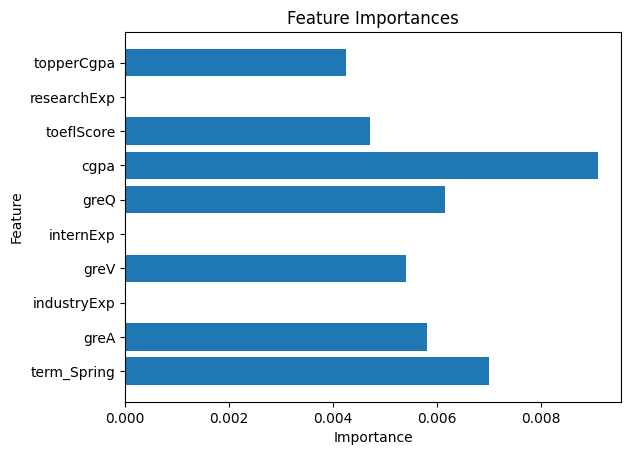

In [ ]:
import matplotlib.pyplot as plt

xgb_model = voting_clf.named_estimators_['Xtreme Gradient Boosting']
xgb_importances = xgb_model.feature_importances_
feature_names = xgb_model.get_booster().feature_names

# Remove columns that start with "univ_"
columns_to_remove = [col for col in feature_names if (col.startswith('univName_') | col.startswith('major') | col.startswith('department') | col.startswith('ugCollege'))]
updated_importances = [imp for imp, feat in zip(xgb_importances, feature_names) if feat not in columns_to_remove]
updated_features = [feat for feat in feature_names if feat not in columns_to_remove]

# Plot the updated feature importances for XGBoost
plt.barh(updated_features, updated_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


***University Recommendation***

***We implemented a recommendation system for universities based on student scores. The purpose of this code is to recommend universities to a new student based on the scores of past students who were admitted to universities. ُSince it was computationally so heavy, we are going with just 1000 records of the data.***

***We first loaded the recommendation dataset and defined the features and target columns. We then shuffled the rows and selected the first 1000 rows to work with. After that, we split the dataset into training and testing sets.***

***To prepare the data for modeling, we scaled the features using StandardScaler to ensure that all features were on the same scale. We then calculated the cosine similarity between students based on their features using cosine_similarity function from scikit-learn.***

***We defined a function called "recommend_university" to recommend universities to a new student. This function takes the scores of the new student and calculates the cosine similarity between the student and the training set. We then find the indices of the most similar students, get the universities applied to by the most similar students, count the frequency of each university, and finally get the top recommended universities.***

***To test the recommendation function, we created a sample student scores dictionary and passed it to the function. The function then printed the top recommended universities based on the scores of past students who were admitted to universities.***

***In the future, we can improve this recommender by incorporating more features into the model such as extracurricular activities, work experience, and letters of recommendation. We can also gather more data to train the model on to increase its accuracy and effectiveness. We can gather more information about students preferences so that we can suggest the universities based on them.***

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load the recommendation dataset

# Define the features and target columns
features = ['univName', 'cgpa', 'greV', 'toeflScore', 'topperCgpa', 'greQ', 'greA', 'admit']

# Shuffle the rows
recommend_df = before_hot_df.sample(frac=1, random_state=42)

# Select the first 1000 rows
recommend_df = recommend_df.head(1000)

# Split the dataset into training and testing sets
train_df = recommend_df[features].copy().sample(frac=0.8, random_state=1)
test_df = recommend_df[features].copy().drop(train_df.index)

# Scale the features using StandardScaler
scaler = StandardScaler()
train_df[features[1:-1]] = scaler.fit_transform(train_df[features[1:-1]])
test_df[features[1:-1]] = scaler.transform(test_df[features[1:-1]])

# Calculate the cosine similarity between students based on their features
train_similarity = cosine_similarity(train_df[features[1:-1]])
test_similarity = cosine_similarity(test_df[features[1:-1]])

# Define a function to recommend universities to a new student
def recommend_university(student_scores, num_recommendations=5):
    # Scale the student's scores using the same scaler used for training
    student_df = pd.DataFrame(student_scores, index=[0], columns=features[1:-1])
    student_df_scaled = scaler.transform(student_df)

    # Calculate the cosine similarity between the student and the training set
    similarity = cosine_similarity(student_df_scaled, train_df[features[1:-1]])[0]

    # Find the indices of the most similar students
    indices = np.argsort(similarity)[-5:]

    # Get the universities applied to by the most similar students
    universities = train_df.iloc[indices][['univName', 'admit']]

    # Count the frequency of each university
    university_counts = universities.groupby('univName').sum()

    # Get the top recommended universities
    recommendations = university_counts.nlargest(num_recommendations, 'admit')

    # Print the names of the recommended universities
    print("We recommend the following universities based on important features:")
    for univ in recommendations.index:
        print(univ)

# Test the recommendation function with sample student scores
student_scores = {'cgpa': 3.8, 'greV': 150, 'toeflScore': 100, 'topperCgpa': 3.8, 'greQ': 155, 'greA': 4.0}
recommend_university(student_scores)


We recommend the following universities:
University of Texas Dallas
SUNY Buffalo
University of Southern California
University of Colorado Boulder
